# Exemplar priming and expectation

(Everything here could use a citation!)

*Exemplar priming* refers to the selective raising of base activation *N* for exemplars who are members of probable categories. In other words, when we have an expectation, exemplars that are consistent with that expectation are able to contribute more activation. In turn, the expected category is even easier to perceive. In experimental results, this is measured with outcomes like reaction time (Is this in McGowan 2015?), accur, or the amount of uncertainty tolerated. 

The type of behavioral evidence we'll be considering here is boundary shifting in categorical perception (Strand and Johnson gradient perception). I consider this to be a somewhat iconic example of top-down expectation: Plotting the results of a forced choice task makes clear that the point at which two categories diverge can be conditioned by other features of the stimulus, including a social expectation.

We assume that categories are learned from exemplars, or instantiations of that category. None of these instantiations occur in a vacuum. Rather, they are context-rich, complex networks of features, use, and meaning. The non-randomness of these patterns makes variation informative.

Categorization blurs the differences between members of the category. We expect an example of the category to be similar to our other examples. blah blah the effect of these two things is that one feature can make us expect other features and those features can change how we perceive the overall stimulus. Blah blah repeated co-occurence during interaction. blah blah meaning is dialogic and made in interaction, etc, etc.

In [1]:
%load_ext autoreload
from ExemPy import *
from ExemPy.utils import *
from ExemPy.viz import *
from ExemPy.GCM import *
%aimport ExemPy, ExemPy.utils, ExemPy.viz, ExemPy.GCM
%autoreload 1
import json
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

## Set up data
- Read in Peterson and Barney 1952
- Convert Hz to Bark
- Set parameters for preliminary categorization

In [2]:
pb52 = pd.read_csv('pb52_data//pb52.csv')
pb52 = HzToBark(pb52,["F0", "F1", "F2", "F3"])
excloud = pb52.copy()


w1 = {'z0' : 0.10, 'z1' : 0.37, 'z2' : 0.23, 'z3' : 0.29}
w2 = {'z0' : 0.17, 'z1' : 0.46, 'z2' : 0.22, 'z3' : 0.15}
w3 = {'z0' : 0.27, 'z1' : 0.16, 'z2' : 0.15, 'z3' : 0.25}
w4 = {'z0' : 0.14, 'z1' : 0.35, 'z2' : 0.26, 'z3' : 0.21}
w5 = {'z0' : 1, 'z1' : .761, 'z2' : .681, 'z3' : .407}

wlist = [w1, w2, w3, w4, w5]

dimslist = list(w1.keys())
catslist = ['type', 'vowel'] 
cval = 25

## Identify a set of non-stereotypical voices

Strand and Johnson uses a set of voices that aren't stereotypical for a binary conception of gender. To approximate this in ExemPy, let's
- Categorize pb52 for gender
- Check type categorization accuracy
- Visualize the miscategorized exemplars relative to accurately categorized exemplars
- Identify which type w speakers were most often mis-categorized

In [3]:
reslist = []
for w in wlist:
    choices = multicat(excloud,
                  excloud,
                  catslist,
                  w,
                  cval,
                  exclude_self = True,
                  N = 1
                  )
    reslist.append(choices)

  type  propcorr
0    c  0.780000
1    m  0.995455
2    w  0.925000


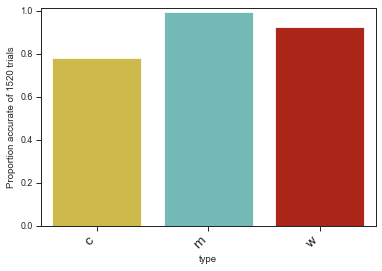

In [4]:
acc = checkaccuracy(choices, "type")
print(propcorr(acc, "type"))
p = accplot(acc, "type")
p.set(title = "Accuracy of type categorization in simulated identification task")
plt.show()

In [5]:
inaccuratetype = acc.loc[acc['typeAcc'] == 'n'].reset_index()
accuratetype = acc.loc[acc['typeAcc'] == 'y'].reset_index()
inaccuratew = inaccuratetype.loc[inaccuratetype['type'] == 'w'].reset_index()

In the following graphs:

- Note: Colors are in a different order from the bar plot above! I hope to fix this, tbd
- The x-axis is a dimension, given in Bark, in ascending order
- The y-axis is the speaker number; these numeric IDs are blocked by speaker type
- The ordering of values on the y-axis is otherwise not meaningful
- The fully saturated points are the exemplars that were categorized inaccurately for speaker type
- The translucent points are the exemplars that were categorized accurately, for comparison

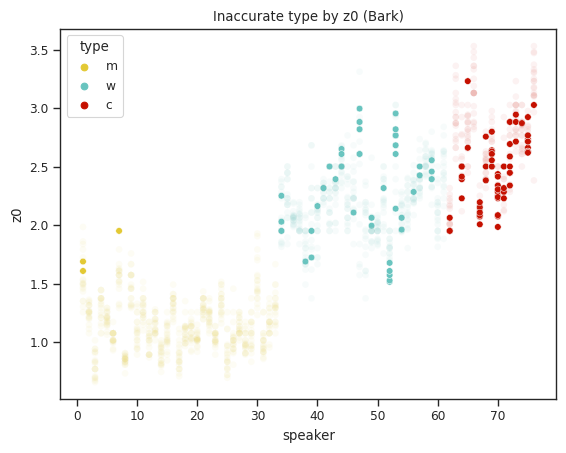

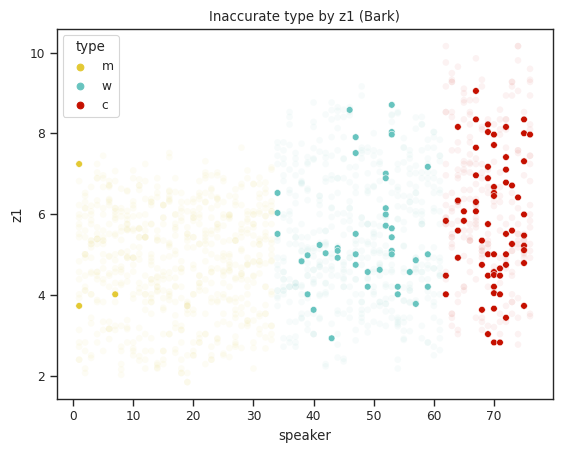

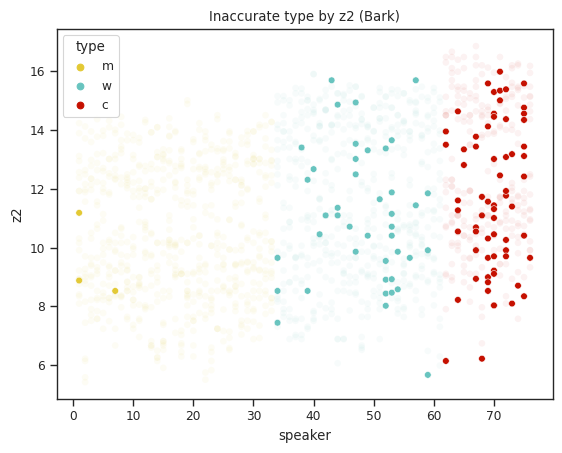

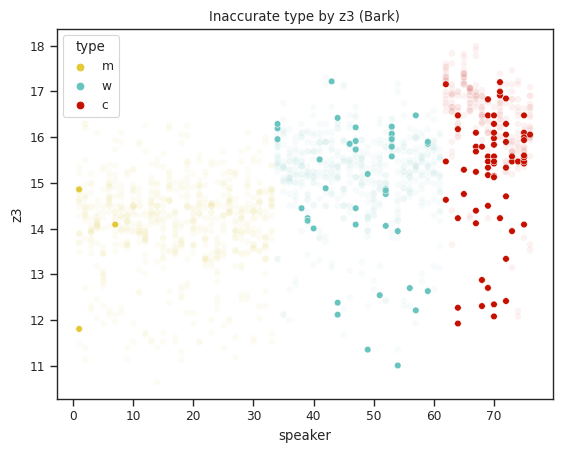

In [6]:
# fix plots so that colors match up: more complicated than it appears

for dim in dimslist:
    p = sns.scatterplot(y = dim,
                    x = "speaker",
                    data = inaccuratetype,
                    hue = "type"
                   )
    m = sns.scatterplot(y = dim,
                    x = "speaker",
                    data = accuratetype,
                    hue = "type",
                    alpha = 0.05,
                    legend = False
                   )
    t = str("Inaccurate type by " + dim + " (Bark)")
    p.set(title = t)
    plt.show()

To visualize this another way, let's look at the number of times each speaker was inaccurately categorized for type:

In [7]:
print("All speakers")
print(inaccuratetype.speaker.value_counts())
print("---")
print("Type w speakers only")
print(inaccuratew.speaker.value_counts())

All speakers
70    13
75     9
72     8
69     8
53     7
67     6
47     5
64     5
52     5
71     4
44     3
62     3
68     3
59     3
73     3
34     3
65     2
1      2
54     2
57     2
49     2
39     2
56     1
7      1
51     1
46     1
43     1
42     1
41     1
40     1
74     1
38     1
76     1
Name: speaker, dtype: int64
---
Type w speakers only
53    7
47    5
52    5
44    3
34    3
59    3
49    2
39    2
54    2
57    2
42    1
43    1
41    1
46    1
38    1
51    1
40    1
56    1
Name: speaker, dtype: int64


## The non-sterotypical type w voices we'll use are 53, 47, and 52

These three type w voices were categorized as another type 5 or more times.
    
|Speaker |Categorized as |Number of times |
|--- |--- |--- |
|53 |c |7 |
|47 |c |5 |
|52 |m |5 |

Let's take a closer look:
- Create a choices dataframes for each speaker
- Look at confusion matrix for speaker type for each speaker
- Create a choices dataframe for the three speakers
- Look at that dataframe

In [8]:
speakerlist = [53, 47, 52]
chxdict = {}
chxlist = []
for sp in speakerlist:
    chx = choices[choices["speaker"] == sp]
    print("Speaker  ", sp)
    print(confusion(chx, "type"))
    chxdict[sp] = chx
    chxlist.append(chx)
nonst_choices = pd.concat(chxlist)

Speaker   53
{'type': typeChoice     c     w
w           0.35  0.65}
Speaker   47
{'type': typeChoice     c     w
w           0.25  0.75}
Speaker   52
{'type': typeChoice     m     w
w           0.25  0.75}


In [9]:
nonst_choices[["speaker",
               "vowel",
               "vowelChoice",
               "vowelProb",
               "typeChoice",
               "typeProb"]]

,speaker,vowel,vowelChoice,vowelProb,typeChoice,typeProb
1040,53,FLEECE,FLEECE,0.951643,w,0.746705
1041,53,FLEECE,FLEECE,0.989677,w,0.772979
1042,53,KIT,KIT,0.994469,w,0.725264
1043,53,KIT,KIT,0.995363,w,0.805836
1044,53,DRESS,DRESS,0.928659,w,0.954469
1045,53,DRESS,DRESS,0.983840,w,0.971617
1046,53,TRAP,TRAP,0.999977,w,0.982013
1047,53,TRAP,TRAP,0.999943,c,0.629459
1048,53,STRUT,STRUT,0.956422,c,0.808340
1049,53,STRUT,STRUT,0.832207,c,0.838678


In [17]:
# for each set of results
i=1
for res in reslist:
    # calculate accuracy 
    acc = checkaccuracy(res, "type")
    inaccuratetype = acc.loc[acc['typeAcc'] == 'n'].reset_index()
    accuratetype = acc.loc[acc['typeAcc'] == 'y'].reset_index()
    inaccuratew = inaccuratetype.loc[inaccuratetype['type'] == 'w'].reset_index()
    print("--- ", i, " ___")
    #print("All speakers")
    #print(inaccuratetype.speaker.value_counts())
    #print("---")
    #print("Type w speakers only")
    print(inaccuratew.speaker.value_counts())
    i+=1

---  1  ___
49    13
53     7
54     5
52     5
46     5
47     4
45     3
34     3
42     3
41     3
40     3
39     3
43     2
44     2
50     2
38     2
56     2
57     2
58     2
59     2
36     1
51     1
37     1
60     1
Name: speaker, dtype: int64
---  2  ___
53    6
47    5
54    5
52    5
49    5
44    4
38    3
39    2
41    2
42    2
51    1
59    1
58    1
57    1
56    1
34    1
50    1
48    1
35    1
46    1
43    1
40    1
37    1
36    1
60    1
Name: speaker, dtype: int64
---  3  ___
53    8
47    6
52    5
39    3
44    3
34    2
38    1
43    1
54    1
59    1
Name: speaker, dtype: int64
---  4  ___
49    10
53     7
47     5
54     5
52     5
41     3
46     2
59     2
50     2
34     2
44     2
39     2
38     2
45     1
36     1
43     1
51     1
42     1
40     1
56     1
57     1
60     1
Name: speaker, dtype: int64
---  5  ___
53    7
47    5
52    5
44    3
34    3
59    3
49    2
39    2
54    2
57    2
42    1
43    1
41    1
46    1
38    1
51    1
40    